# Reinforcement Learning solving MDP Problems

In [1]:
# set plots inline for ipython
%matplotlib inline

# general python imports
from time import time

# Standard scientific Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# set the figure sizes
#plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.figsize': (4,3)})

## Compare VI and PI

In [3]:
# load data
vi_e=pd.read_csv('output/Easy Value.csv', header=0)
pi_e=pd.read_csv('output/Easy Policy.csv', header=0)
vi_h=pd.read_csv('output/Hard Value.csv', header=0)
pi_h=pd.read_csv('output/Hard Policy.csv', header=0)
vi_e_dc9=pd.read_csv('output-discount-point9/Easy Value.csv', header=0)
pi_e_dc9=pd.read_csv('output-discount-point9/Easy Policy.csv', header=0)
vi_h_dc9=pd.read_csv('output-discount-point9/Hard Value.csv', header=0)
pi_h_dc9=pd.read_csv('output-discount-point9/Hard Policy.csv', header=0)

In [4]:
vi_e.head(2)

iter      time  reward   steps  convergence
0     1  0.017555 -179.50  185.76    79.800000
1     2  0.042481  -35.66  104.48    62.923631

In [5]:
pi_e.head(2)

iter      time  reward  steps  convergence
0     1  0.082945  -80.54  138.1    79.800000
1     2  0.119274   75.44   19.7    59.371049

### plot convergence

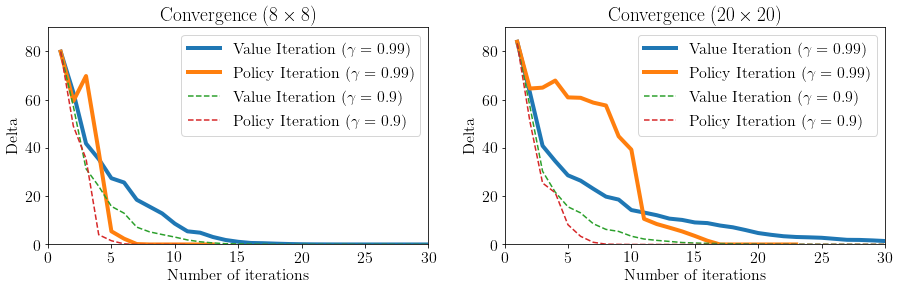

In [80]:
# Easy
plt.figure()
fig=plt.figure(figsize=(15, 4))


plt.subplot(121)


plt.plot(vi_e['iter'], vi_e['convergence'], linewidth=4, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_e['iter'], pi_e['convergence'], linewidth=4, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_e_dc9['iter'], vi_e_dc9['convergence'], linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_e_dc9['iter'], pi_e_dc9['convergence'], linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='best')
plt.title(r'Convergence ($8 \times 8$)')
plt.xlabel('Number of iterations')
plt.ylabel('Delta');
plt.ylim(0, 90)
plt.xlim(0, 30)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
#plt.xticks(np.arange(0,31,5))
plt.subplot(122)

plt.plot(vi_h['iter'], vi_h['convergence'], linewidth=4, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_h['iter'], pi_h['convergence'], linewidth=4, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_h_dc9['iter'], vi_h_dc9['convergence'], linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_h_dc9['iter'], pi_h_dc9['convergence'], linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')


plt.legend(loc='best')
plt.title(r'Convergence ($20 \times 20$)')
plt.xlabel('Number of iterations')
plt.ylabel('Delta');
plt.ylim(0, 90)
plt.xlim(0, 30)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
#plt.xticks(np.arange(0,31,5))
plt.show()
fig.savefig("f001.pdf", bbox_inches='tight')


In [61]:
# hard


### Plot time per iteration

In [88]:
# Easy
plt.figure()
fig=plt.figure(figsize=(15, 4))


plt.subplot(121)


plt.plot(vi_e['iter'], vi_e['time'], linewidth=4, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_e['iter'], pi_e['time'], linewidth=4, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_e_dc9['iter'], vi_e_dc9['time'], linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_e_dc9['iter'], pi_e_dc9['time'], linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='best')
plt.title(r'Time Per Iteration ($8 \times 8$)')
plt.xlabel('Number of iterations')
plt.ylabel('Time (s)');
plt.xlim(0, 40)

#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
#plt.xticks(np.arange(0,31,5))
plt.subplot(122)
plt.plot(vi_h['iter'], vi_h['time'], linewidth=4, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_h['iter'], pi_h['time'], linewidth=4, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_h_dc9['iter'], vi_h_dc9['time'], linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_h_dc9['iter'], pi_h_dc9['time'], linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='best')
plt.title(r'Time Per Iteration ($20 \times 20$)')
plt.xlabel('Number of iterations')
plt.ylabel('Time (s)');
plt.xlim(0, 40)

#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.show()
fig.savefig("f002.pdf", bbox_inches='tight')



### Plot cum time

In [10]:
cum_time = np.cumsum(vi_e['time'])
cum_time.head()

0    0.017555
1    0.060036
2    0.110342
3    0.165746
4    0.231947
Name: time, dtype: float64

In [11]:
vi_e['time'].head()

0    0.017555
1    0.042481
2    0.050307
3    0.055404
4    0.066201
Name: time, dtype: float64

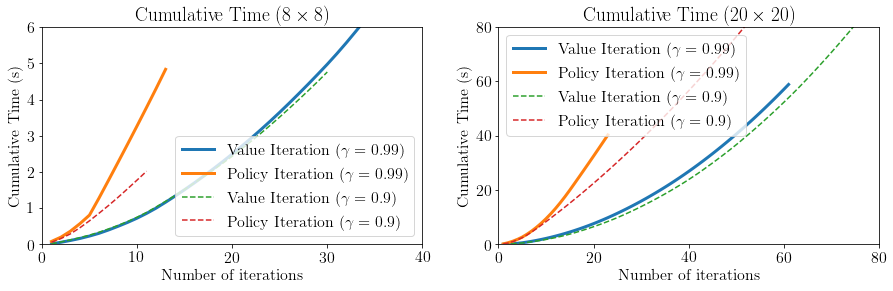

In [95]:
# Easy
plt.figure()
fig=plt.figure(figsize=(15, 4))

plt.subplot(121)


vi_e_cum_time = np.cumsum(vi_e['time'])
pi_e_cum_time = np.cumsum(pi_e['time'])
vi_e_cum_time_dc9 = np.cumsum(vi_e_dc9['time'])
pi_e_cum_time_dc9 = np.cumsum(pi_e_dc9['time'])

plt.plot(vi_e['iter'], vi_e_cum_time, linewidth=3, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_e['iter'], pi_e_cum_time, linewidth=3, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_e_dc9['iter'], vi_e_cum_time_dc9, linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_e_dc9['iter'], pi_e_cum_time_dc9, linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='lower right')
plt.title(r'Cumulative Time ($8 \times 8$)')
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative Time (s)');
plt.xlim(0, 40)
plt.ylim(0, 6)


#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
# Hard
plt.subplot(122)


vi_h_cum_time = np.cumsum(vi_h['time'])
pi_h_cum_time = np.cumsum(pi_h['time'])
vi_h_cum_time_dc9 = np.cumsum(vi_h_dc9['time'])
pi_h_cum_time_dc9 = np.cumsum(pi_h_dc9['time'])

plt.plot(vi_h['iter'], vi_h_cum_time, linewidth=3, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_h['iter'], pi_h_cum_time, linewidth=3, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_h_dc9['iter'], vi_h_cum_time_dc9, linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_h_dc9['iter'], pi_h_cum_time_dc9, linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='southeast')
plt.title(r'Cumulative Time ($20 \times 20$)')
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative Time (s)');
#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.xlim(0, 80)
plt.ylim(0, 80)


plt.show()
fig.savefig("f003.pdf", bbox_inches='tight')



### plot steps

In [100]:
# Easy
# Easy
plt.figure()
fig=plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(vi_e['iter'], vi_e['steps'], linewidth=3, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_e['iter'], pi_e['steps'], linewidth=3, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_e_dc9['iter'], vi_e_dc9['steps'], linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_e_dc9['iter'], pi_e_dc9['steps'], linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='best')
plt.title(r'Steps ($8 \times 8$)')
plt.xlabel('Number of iterations')
plt.ylabel('Step');
#plt.ylim(0, 200)
#plt.xticks(np.arange(0,31,5))
plt.xlim(0, 20)
plt.ylim(0, 200)


plt.subplot(122)

# Hard
plt.plot(vi_h['iter'], vi_h['steps'], linewidth=3, label='Value Iteration ($\gamma=0.99$)')
plt.plot(pi_h['iter'], pi_h['steps'], linewidth=3, label='Policy Iteration ($\gamma=0.99$)')
plt.plot(vi_h_dc9['iter'], vi_h_dc9['steps'], linestyle='dashed', label='Value Iteration ($\gamma=0.9$)')
plt.plot(pi_h_dc9['iter'], pi_h_dc9['steps'], linestyle='dashed', label='Policy Iteration ($\gamma=0.9$)')

plt.legend(loc='best')
plt.title(r'Steps ($20 \times 20$)')
plt.xlabel('Number of iterations')
plt.ylabel('Step');
plt.xlim(0, 40)
plt.ylim(0, 350)

#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.show()
fig.savefig("f004.pdf", bbox_inches='tight')



### Plot rewards

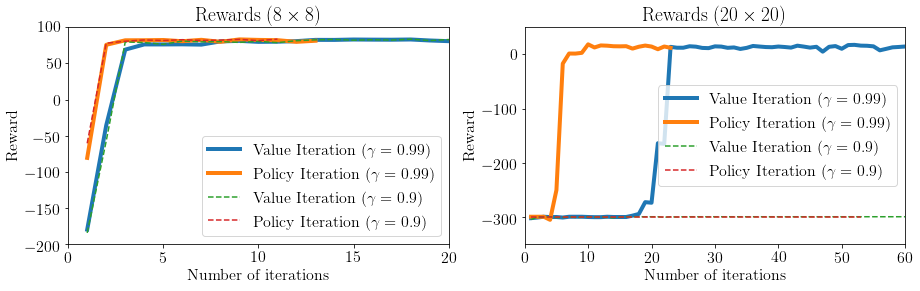

In [112]:
# Easy
# Easy
plt.figure()
fig=plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(vi_e['iter'], vi_e['reward'], linewidth=4, label='Value Iteration $(\gamma=0.99)$')
plt.plot(pi_e['iter'], pi_e['reward'], linewidth=4, label='Policy Iteration $(\gamma=0.99)$')
plt.plot(vi_e_dc9['iter'], vi_e_dc9['reward'], linestyle='dashed', label='Value Iteration $(\gamma=0.9)$')
plt.plot(pi_e_dc9['iter'], pi_e_dc9['reward'], linestyle='dashed', label='Policy Iteration $(\gamma=0.9)$')

plt.legend(loc='best')
plt.title(r'Rewards ($8 \times 8$)')
plt.xlabel('Number of iterations')
plt.ylabel('Reward');
#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
# Hard
plt.xlim(0, 20)
plt.ylim(-200, 100)

plt.subplot(122)

plt.plot(vi_h['iter'], vi_h['reward'], linewidth=4, label='Value Iteration $(\gamma=0.99)$')
plt.plot(pi_h['iter'], pi_h['reward'], linewidth=4, label='Policy Iteration $(\gamma=0.99)$')
plt.plot(vi_h_dc9['iter'], vi_h_dc9['reward'], linestyle='dashed', label='Value Iteration $(\gamma=0.9)$')
plt.plot(pi_h_dc9['iter'], pi_h_dc9['reward'], linestyle='dashed', label='Policy Iteration $(\gamma=0.9)$')

plt.legend(loc='best')
plt.title(r'Rewards ($20 \times 20$)')
plt.xlabel('Number of iterations')
plt.ylabel('Reward');
plt.xlim(0, 60)
plt.ylim(-350, 50)


#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.show()
fig.savefig("f005.pdf", bbox_inches='tight')



### vary size

In [18]:
vi_size=pd.read_csv('output/size Value.csv', header=0)
pi_size=pd.read_csv('output/size Policy.csv', header=0)
q_size=pd.read_csv('output/size Q-Learning L0.1 E0.5.csv', header=0)

In [19]:
# size - time
plt.plot(vi_size['shape'], vi_size['iter'], linewidth=3, label='Value Iteration')
plt.plot(pi_size['shape'], pi_size['iter'], linewidth=3, label='Policy Iteration')
#plt.plot(q_size['shape'], q_size['iter'], linewidth=3, label='Q-Learning')

plt.legend(loc='best')
plt.title('Iteration vs Size')
plt.xlabel('n (of n x n grid)')
plt.ylabel('Iteration');
#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.show()

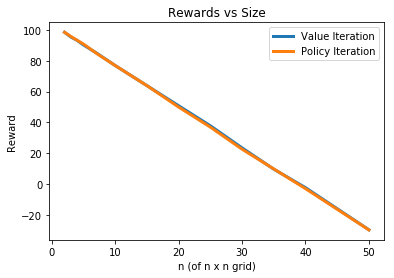

In [20]:
# size - reward
plt.plot(vi_size['shape'], vi_size['reward'], linewidth=3, label='Value Iteration')
plt.plot(pi_size['shape'], pi_size['reward'], linewidth=3, label='Policy Iteration')
#plt.plot(q_size['shape'], q_size['reward'], linewidth=3, label='Q-Learning')

plt.legend(loc='best')
plt.title('Rewards vs Size')
plt.xlabel('n (of n x n grid)')
plt.ylabel('Reward');
#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.show()

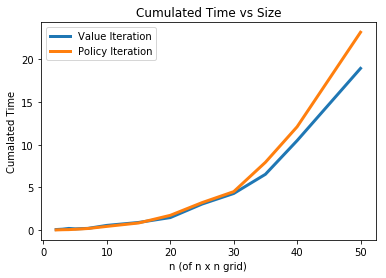

In [21]:
# size - time
plt.plot(vi_size['shape'], vi_size['time'], linewidth=3, label='Value Iteration')
plt.plot(pi_size['shape'], pi_size['time'], linewidth=3, label='Policy Iteration')
#plt.plot(q_size['shape'], q_size['time'], linewidth=3, label='Q-Learning')

plt.legend(loc='best')
plt.title('Cumulated Time vs Size')
plt.xlabel('n (of n x n grid)')
plt.ylabel('Cumalated Time');
#plt.ylim(0.9, 1.01)
#plt.xticks(np.arange(0,31,5))
plt.show()

## Q-Learning

### Learning Rate: change learning rate, fix gamma=0.99, qinit=0, epsilon=0.5

In [115]:
qe1=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qe2=pd.read_csv('output/Easy Q-Learning L0.5 q0.0 E0.5.csv', header=0)
qe3=pd.read_csv('output/Easy Q-Learning L0.9 q0.0 E0.5.csv', header=0)
qh1=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qh2=pd.read_csv('output/Hard Q-Learning L0.5 q0.0 E0.5.csv', header=0)
qh3=pd.read_csv('output/Hard Q-Learning L0.9 q0.0 E0.5.csv', header=0)

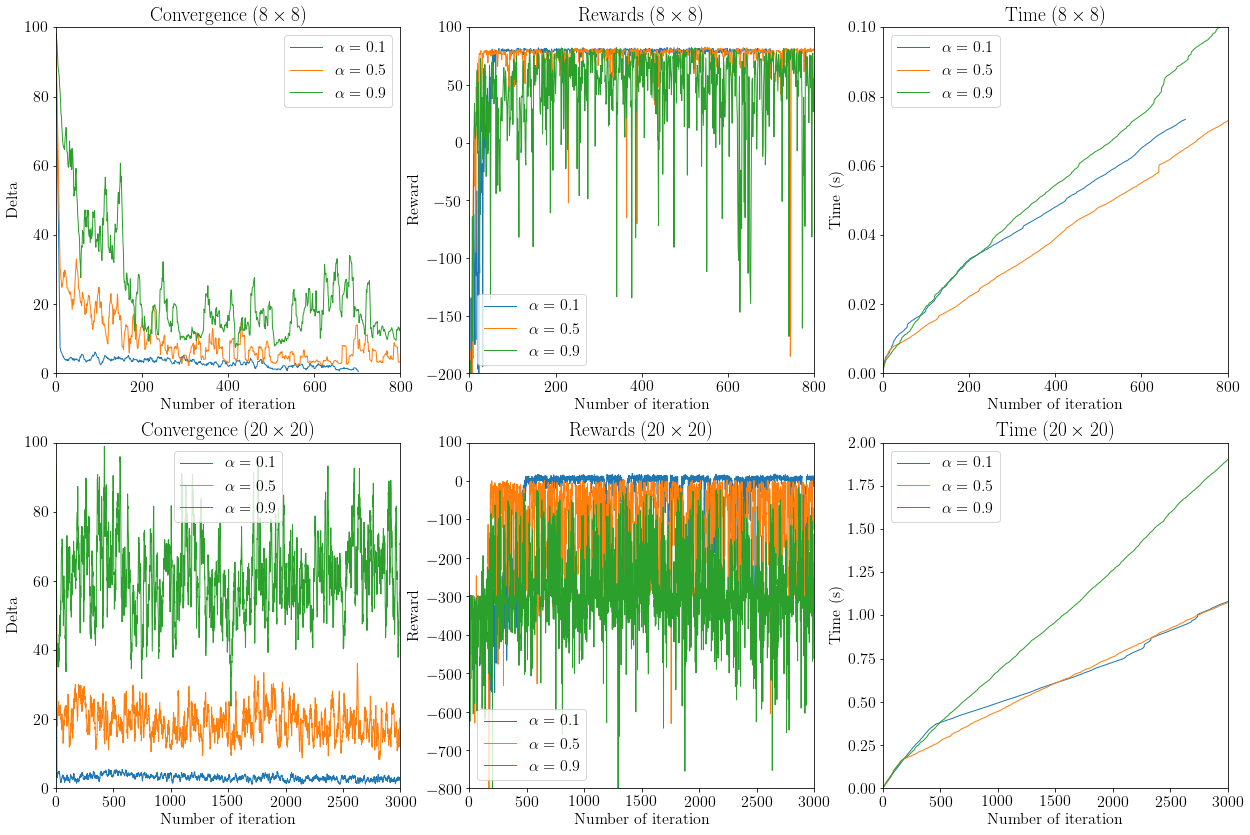

In [134]:
# Easy
plt.figure()
fig=plt.figure(figsize=(21, 14))
               
# convergence
plt.subplot(231)
plt.plot(qe1['iter'], qe1['convergence'], linewidth=1, label=r'$\alpha = 0.1$')
plt.plot(qe2['iter'], qe2['convergence'], linewidth=1, label=r'$\alpha = 0.5$')
plt.plot(qe3['iter'], qe3['convergence'], linewidth=1, label=r'$\alpha = 0.9$')

plt.legend(loc='best')
plt.title(r'Convergence ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0, 800)
plt.ylim(0, 100)


               
# reward
plt.subplot(232)
plt.plot(qe1['iter'], qe1['reward'], linewidth=1, label=r'$\alpha = 0.1$')
plt.plot(qe2['iter'], qe2['reward'], linewidth=1, label=r'$\alpha = 0.5$')
plt.plot(qe3['iter'], qe3['reward'], linewidth=1, label=r'$\alpha = 0.9$')
plt.legend(loc='best')
plt.title(r'Rewards ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0, 800)
plt.ylim(-200, 100)


# time
plt.subplot(233)
plt.plot(qe1['iter'], qe1['time'], linewidth=1, label=r'$\alpha = 0.1$')
plt.plot(qe2['iter'], qe2['time'], linewidth=1, label=r'$\alpha = 0.5$')
plt.plot(qe3['iter'], qe3['time'], linewidth=1, label=r'$\alpha = 0.9$')
plt.legend(loc='best')
plt.title(r'Time ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0, 800)
plt.ylim(0, 0.10)


# convergence
plt.subplot(234)
plt.plot(qh1['iter'], qh1['convergence'], linewidth=1, label=r'$\alpha = 0.1$')
plt.plot(qh2['iter'], qh2['convergence'], linewidth=1, label=r'$\alpha = 0.5$')
plt.plot(qh3['iter'], qh3['convergence'], linewidth=1, label=r'$\alpha = 0.9$')

plt.legend(loc='best')
plt.title(r'Convergence ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0, 3000)
plt.ylim(0, 100)

               
# reward
plt.subplot(235)
plt.plot(qh1['iter'], qh1['reward'], linewidth=1, label=r'$\alpha = 0.1$')
plt.plot(qh2['iter'], qh2['reward'], linewidth=1, label=r'$\alpha = 0.5$')
plt.plot(qh3['iter'], qh3['reward'], linewidth=1, label=r'$\alpha = 0.9$')
plt.legend(loc='best')
plt.title(r'Rewards ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0, 3000)
plt.ylim(-800, 100)


# time
plt.subplot(236)
plt.plot(qh1['iter'], qh1['time'], linewidth=1, label=r'$\alpha = 0.1$')
plt.plot(qh2['iter'], qh2['time'], linewidth=1, label=r'$\alpha = 0.5$')
plt.plot(qh3['iter'], qh3['time'], linewidth=1, label=r'$\alpha = 0.9$')
plt.legend(loc='best')
plt.title(r'Time ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0, 3000)
plt.ylim(0, 2.0)


plt.show()
fig.savefig("f006.pdf", bbox_inches='tight')



In [120]:
# Hard
plt.figure()
fig=plt.figure(figsize=(21, 4))
               
# convergence
plt.subplot(131)
plt.plot(qh1['iter'], qh1['convergence'], linewidth=3, label=r'$\alpha = 0.1$')
plt.plot(qh2['iter'], qh2['convergence'], linewidth=3, label=r'$\alpha = 0.5$')
plt.plot(qh3['iter'], qh3['convergence'], linewidth=3, label=r'$\alpha = 0.9$')

plt.legend(loc='best')
plt.title('Convergence (Hard)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
               
# reward
plt.subplot(132)
plt.plot(qh1['iter'], qh1['reward'], linewidth=4, label='$\alpha = 0.1$')
plt.plot(qh2['iter'], qh2['reward'], linewidth=1, label='$\alpha = 0.5$')
plt.plot(qh3['iter'], qh3['reward'], linewidth=1, label='$\alpha = 0.9$')
plt.legend(loc='best')
plt.title('Rewards (Hard)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')

# time
plt.subplot(133)
plt.plot(qh1['iter'], qh1['time'], linewidth=3, label='$\alpha = 0.1$')
plt.plot(qh2['iter'], qh2['time'], linewidth=3, label='$\alpha = 0.5$')
plt.plot(qh3['iter'], qh3['time'], linewidth=3, label='$\alpha = 0.9$')
plt.legend(loc='best')
plt.title('Time (Hard)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')

plt.show()

RuntimeError: LaTeX was not able to process the following string:
b'$\\x07lpha = 0.9$'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./255c0da2ec72df195dc5f33e286036e1.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 255c0da2ec72df195dc5f33e286036e1.aux.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Text line contains an invalid character.
l.12 ...tsize{16.000000}{20.000000}{\rmfamily $^^G
                                                  lpha = 0.9$}
[1] (./255c0da2ec72df195dc5f33e286036e1.aux) )
(see the transcript file for additional information)
Output written on 255c0da2ec72df195dc5f33e286036e1.dvi (1 page, 300 bytes).
Transcript written on 255c0da2ec72df195dc5f33e286036e1.log.


### Epsilon: change epsilon, fix gamma=0.99, qinit=0, lr = 0.1

In [135]:
qe1=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.1.csv', header=0)
qe2=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.3.csv', header=0)
qe3=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qe4=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.7.csv', header=0)
qh1=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.1.csv', header=0)
qh2=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.3.csv', header=0)
qh3=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qh4=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.7.csv', header=0)

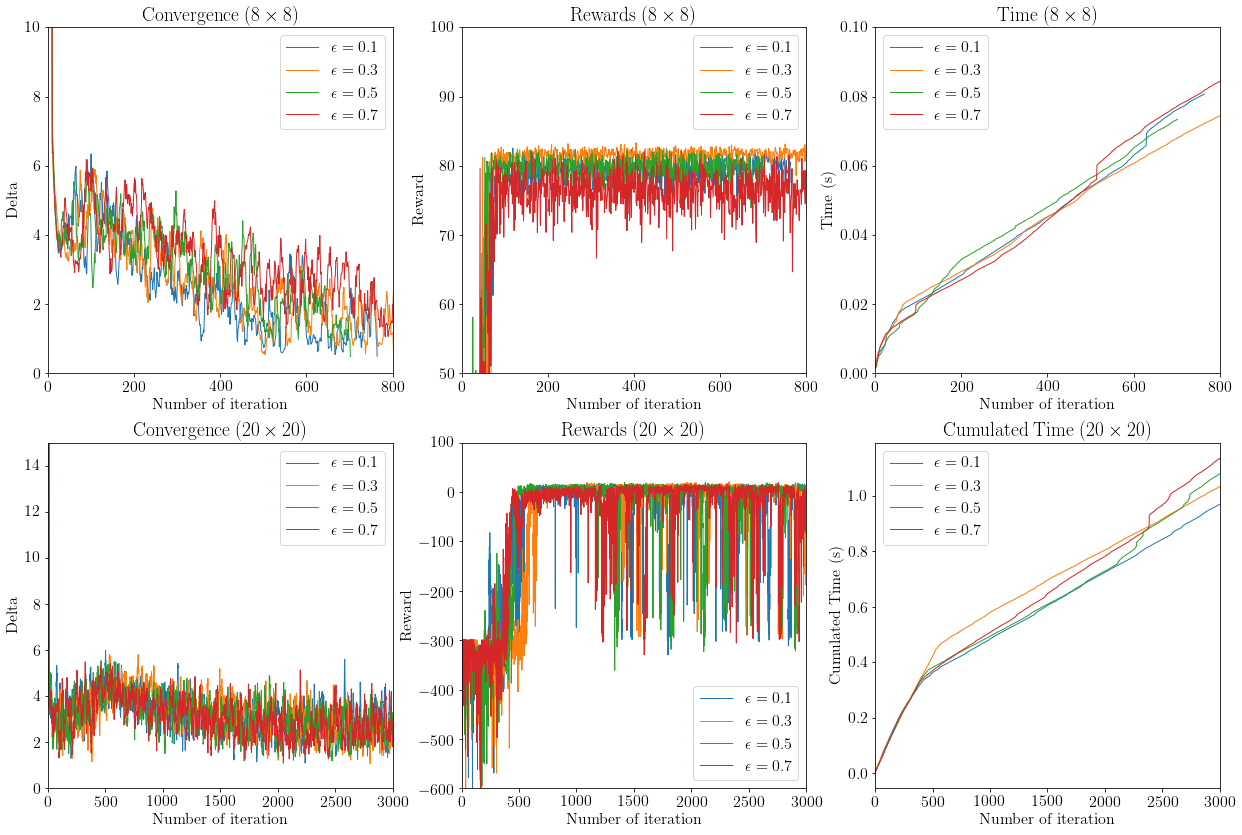

In [147]:
# Easy
plt.figure()
fig=plt.figure(figsize=(21, 14))
               
# convergence
plt.subplot(231)
plt.plot(qe1['iter'], qe1['convergence'], linewidth=1, label=r'$\epsilon = 0.1$')
plt.plot(qe2['iter'], qe2['convergence'], linewidth=1, label=r'$\epsilon = 0.3$')
plt.plot(qe3['iter'], qe3['convergence'], linewidth=1, label=r'$\epsilon = 0.5$')
plt.plot(qe4['iter'], qe4['convergence'], linewidth=1, label=r'$\epsilon = 0.7$')

plt.legend(loc='best')
plt.title(r'Convergence ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,800)
plt.ylim(0,10)
               
# reward
plt.subplot(232)
plt.plot(qe1['iter'], qe1['reward'], linewidth=1, label=r'$\epsilon = 0.1$')
plt.plot(qe2['iter'], qe2['reward'], linewidth=1, label=r'$\epsilon = 0.3$')
plt.plot(qe3['iter'], qe3['reward'], linewidth=1, label=r'$\epsilon = 0.5$')
plt.plot(qe4['iter'], qe4['reward'], linewidth=1, label=r'$\epsilon = 0.7$')
plt.legend(loc='best')
plt.title(r'Rewards ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,800)
plt.ylim(50,100)

# time
plt.subplot(233)
plt.plot(qe1['iter'], qe1['time'], linewidth=1, label=r'$\epsilon = 0.1$')
plt.plot(qe2['iter'], qe2['time'], linewidth=1, label=r'$\epsilon = 0.3$')
plt.plot(qe3['iter'], qe3['time'], linewidth=1, label=r'$\epsilon = 0.5$')
plt.plot(qe4['iter'], qe4['time'], linewidth=1, label=r'$\epsilon = 0.7$')
plt.legend(loc='best')
plt.title(r'Time ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,800)
plt.ylim(0,.10)



               
# convergence
plt.subplot(234)
plt.plot(qh1['iter'], qh1['convergence'], linewidth=1, label=r'$\epsilon = 0.1$')
plt.plot(qh2['iter'], qh2['convergence'], linewidth=1, label=r'$\epsilon = 0.3$')
plt.plot(qh3['iter'], qh3['convergence'], linewidth=1, label=r'$\epsilon = 0.5$')
plt.plot(qh4['iter'], qh4['convergence'], linewidth=1, label=r'$\epsilon = 0.7$')


plt.legend(loc='best')
plt.title(r'Convergence ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,3000)
plt.ylim(0,15)


               
# reward
plt.subplot(235)
plt.plot(qh1['iter'], qh1['reward'], linewidth=1, label=r'$\epsilon = 0.1$')
plt.plot(qh2['iter'], qh2['reward'], linewidth=1, label=r'$\epsilon = 0.3$')
plt.plot(qh3['iter'], qh3['reward'], linewidth=1, label=r'$\epsilon = 0.5$')
plt.plot(qh4['iter'], qh4['reward'], linewidth=1, label=r'$\epsilon = 0.7$')
plt.legend(loc='best')
plt.title(r'Rewards ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,3000)
plt.ylim(-600,100)



# time
plt.subplot(236)
plt.plot(qh1['iter'], qh1['time'], linewidth=1, label=r'$\epsilon = 0.1$')
plt.plot(qh2['iter'], qh2['time'], linewidth=1, label=r'$\epsilon = 0.3$')
plt.plot(qh3['iter'], qh3['time'], linewidth=1, label=r'$\epsilon = 0.5$')
plt.plot(qh4['iter'], qh4['time'], linewidth=1, label=r'$\epsilon = 0.7$')
plt.legend(loc='best')
plt.title(r'Cumulated Time ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Cumulated Time (s)')
plt.xlim(0,3000)


plt.show()
fig.savefig("f007.pdf", bbox_inches='tight')



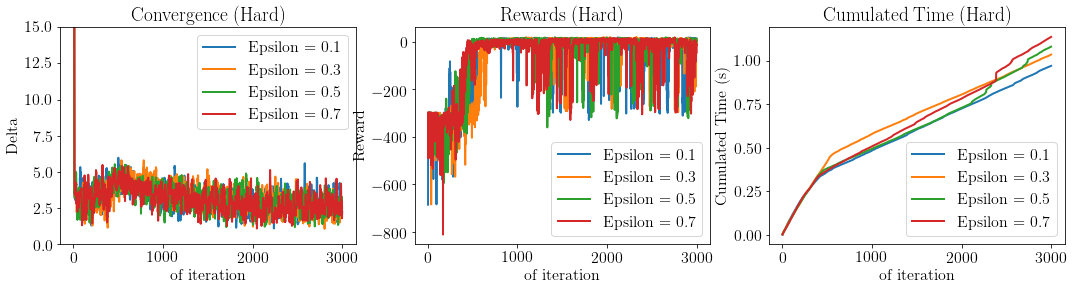

In [137]:
# Hard
plt.figure()
fig=plt.figure(figsize=(18, 4))


### Q init: change QInit, fix lr=0.1, epsilon=0.5, gamma=0.99

In [28]:
qe1=pd.read_csv('output/Easy Q-Learning L0.1 q-100.0 E0.5.csv', header=0)
qe2=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qe3=pd.read_csv('output/Easy Q-Learning L0.1 q100.0 E0.5-converge0.25.csv', header=0)
#qh1=pd.read_csv('output/Hard Q-Learning L0.1 q-100.0 E0.5.csv', header=0)
qh2=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qh3=pd.read_csv('output/Hard Q-Learning L0.1 q100.0 E0.5.csv', header=0)

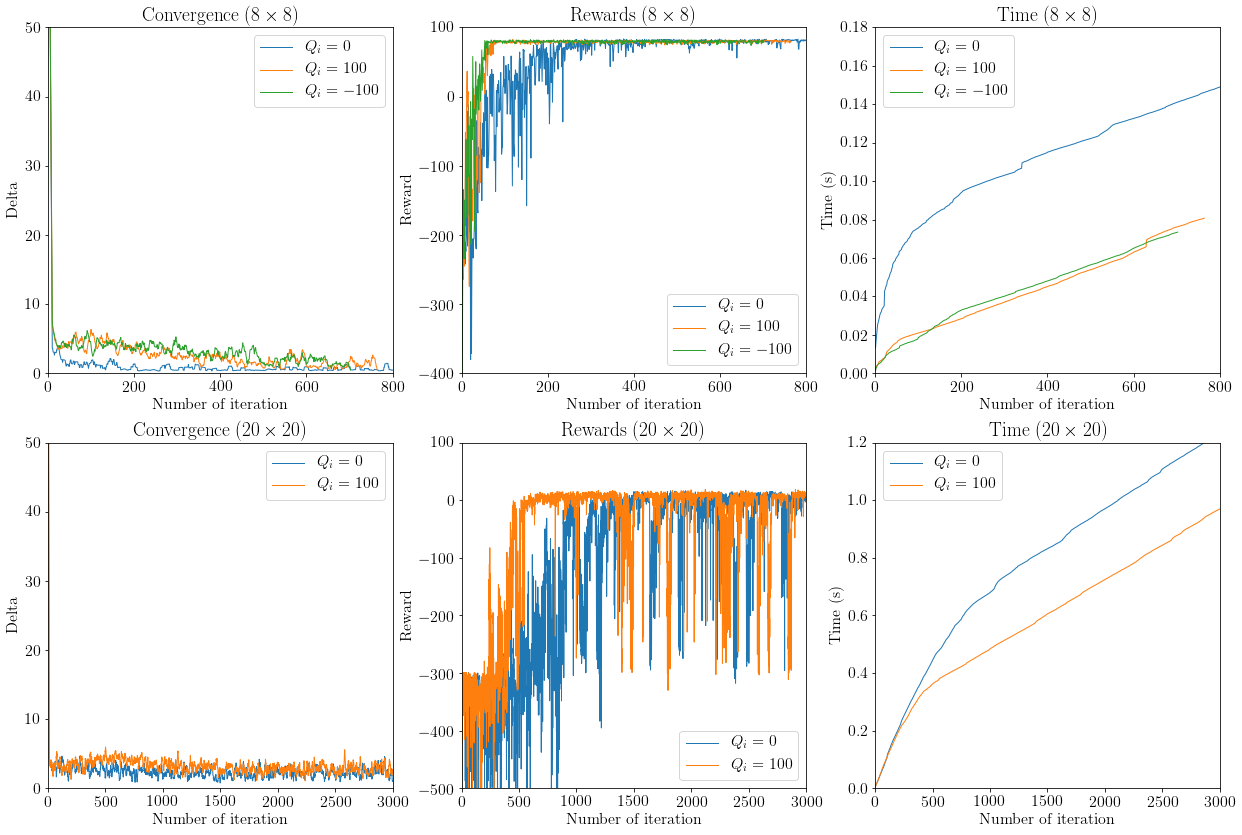

In [203]:
# Easy
plt.figure()
fig=plt.figure(figsize=(21, 14))
               
# convergence
plt.subplot(231)
plt.plot(qe2['iter'], qe2['convergence'], linewidth=1, label=r'$Q_i = 0$')
plt.plot(qe3['iter'], qe3['convergence'], linewidth=1, label=r'$Q_i = 100$')
plt.plot(qe1['iter'], qe1['convergence'], linewidth=1, label=r'$Q_i = -100$')
plt.xlim(0,800)
plt.ylim(0,50)



plt.legend(loc='best')
plt.title(r'Convergence ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
               
# reward
plt.subplot(232)
plt.plot(qe2['iter'], qe2['reward'], linewidth=1, label=r'$Q_i = 0$')
plt.plot(qe3['iter'], qe3['reward'], linewidth=1, label=r'$Q_i = 100$')
plt.plot(qe1['iter'], qe1['reward'], linewidth=1, label=r'$Q_i = -100$')
plt.xlim(0,800)
plt.ylim(-400,100)


plt.legend(loc='best')
#plt.ylim(0,100)
plt.title(r'Rewards ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')

# time
plt.subplot(233)
plt.plot(qe2['iter'], qe2['time'], linewidth=1, label=r'$Q_i = 0$')
plt.plot(qe3['iter'], qe3['time'], linewidth=1, label=r'$Q_i = 100$')
plt.plot(qe1['iter'], qe1['time'], linewidth=1, label=r'$Q_i = -100$')

plt.legend(loc='best')
plt.title(r'Time ($8 \times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,800)
plt.ylim(0,.18)


# Hard
# convergence
plt.subplot(234)
#plt.plot(qh1['iter'], qh1['convergence'], linewidth=1, label=r'$Q_i = -100')
plt.plot(qh2['iter'], qh2['convergence'], linewidth=1, label=r'$Q_i = 0$')
plt.plot(qh3['iter'], qh3['convergence'], linewidth=1, label=r'$Q_i = 100$')

plt.legend(loc='best')
plt.title(r'Convergence ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,3000)
plt.ylim(0,50)

               
# reward
plt.subplot(235)
#plt.plot(qh1['iter'], qh1['reward'], linewidth=1, label=r'$Q_i = -100')
plt.plot(qh2['iter'], qh2['reward'], linewidth=1, label=r'$Q_i = 0$')
plt.plot(qh3['iter'], qh3['reward'], linewidth=1, label=r'$Q_i = 100$')
plt.legend(loc='best')
plt.title(r'Rewards ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,3000)
plt.ylim(-500,100)


# time
plt.subplot(236)
#plt.plot(qh1['iter'], qh1['time'], linewidth=1, label=r'$Q_i = -100')
plt.plot(qh2['iter'], qh2['time'], linewidth=1, label=r'$Q_i = 0$')
plt.plot(qh3['iter'], qh3['time'], linewidth=1, label=r'$Q_i = 100$')
plt.legend(loc='best')
plt.title(r'Time ($20 \times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,3000)
plt.ylim(0,1.2)


plt.show()
fig.savefig("f011.pdf", bbox_inches='tight')



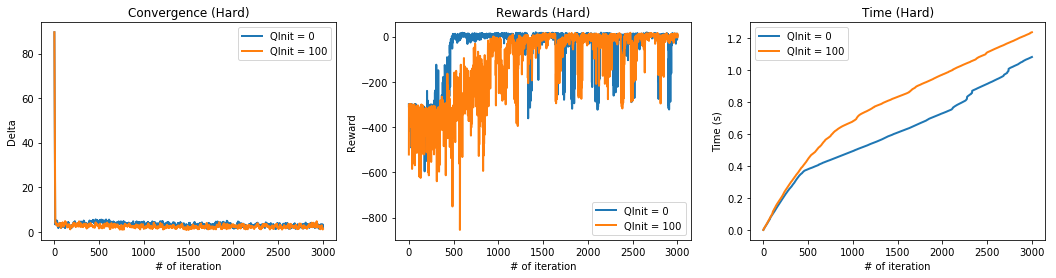

### Discount Rate: change gamma, fix lr=0.1, epsilon=0.5, qinit=0

In [150]:
qe1=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qe2=pd.read_csv('output-discount-point9/Easy Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qh1=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qh2=pd.read_csv('output-discount-point9/Hard Q-Learning L0.1 q0.0 E0.5.csv', header=0)

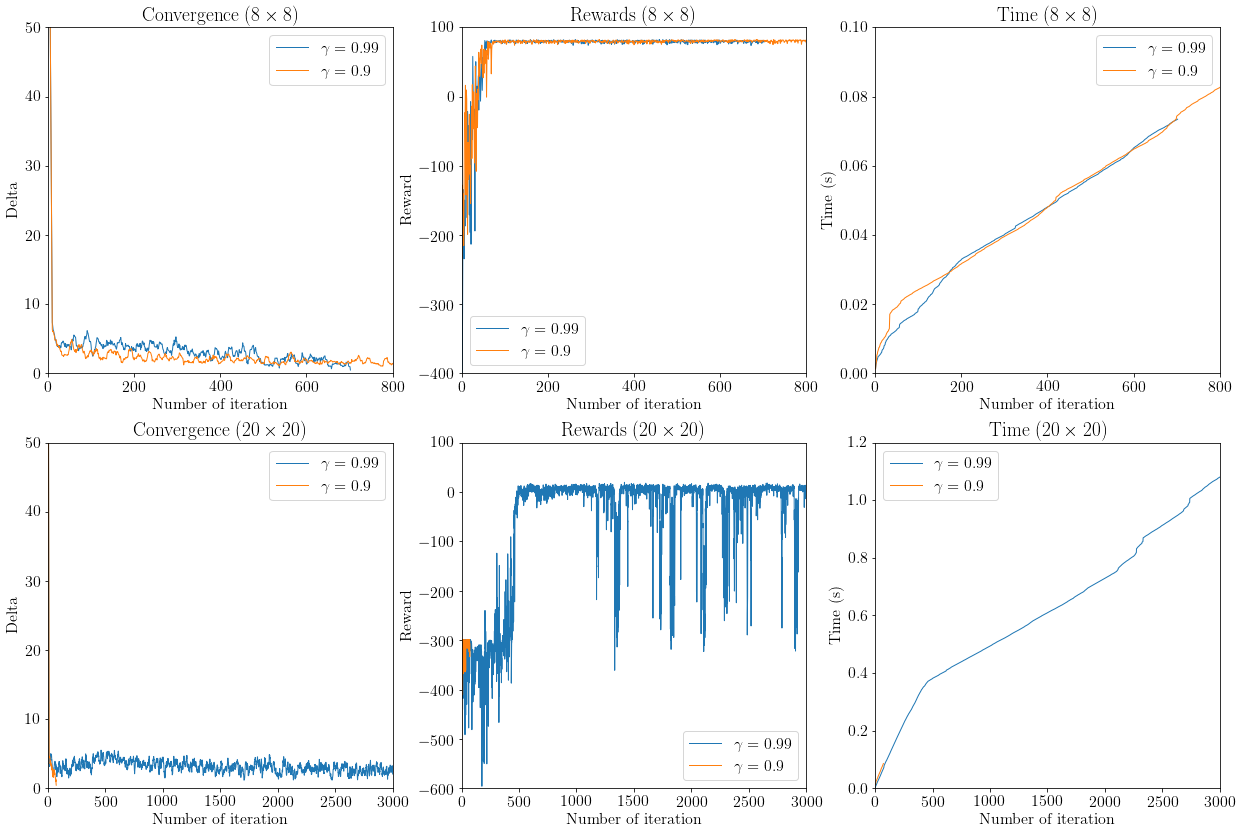

In [157]:
# Easy
plt.figure()
fig=plt.figure(figsize=(21, 14))
               
# convergence
plt.subplot(231)
plt.plot(qe1['iter'], qe1['convergence'], linewidth=1, label='$\gamma = 0.99$')
plt.plot(qe2['iter'], qe2['convergence'], linewidth=1, label='$\gamma = 0.9$')

plt.legend(loc='best')
plt.title(r'Convergence ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,800)
plt.ylim(0,50)

               
# reward
plt.subplot(232)
plt.plot(qe1['iter'], qe1['reward'], linewidth=1, label='$\gamma = 0.99$')
plt.plot(qe2['iter'], qe2['reward'], linewidth=1, label='$\gamma = 0.9$')
plt.legend(loc='best')
#plt.ylim(-100,100)
plt.title(r'Rewards ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,800)
plt.ylim(-400,100)


# time
plt.subplot(233)
plt.plot(qe1['iter'], qe1['time'], linewidth=1, label='$\gamma = 0.99$')
plt.plot(qe2['iter'], qe2['time'], linewidth=1, label='$\gamma = 0.9$')
plt.legend(loc='best')
plt.title(r'Time ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,800)
plt.ylim(0,.1)



# Hard               
# convergence
plt.subplot(234)
plt.plot(qh1['iter'], qh1['convergence'], linewidth=1, label='$\gamma = 0.99$')
plt.plot(qh2['iter'], qh2['convergence'], linewidth=1, label='$\gamma = 0.9$')

plt.legend(loc='best')
plt.title(r'Convergence ($20\times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,3000)
plt.ylim(0,50)               
# reward
plt.subplot(235)
plt.plot(qh1['iter'], qh1['reward'], linewidth=1, label='$\gamma = 0.99$')
plt.plot(qh2['iter'], qh2['reward'], linewidth=1, label='$\gamma = 0.9$')
plt.legend(loc='best')
#plt.ylim(-100,100)
plt.title(r'Rewards ($20\times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,3000)
plt.ylim(-600,100)


# time
plt.subplot(236)
plt.plot(qh1['iter'], qh1['time'], linewidth=1, label='$\gamma = 0.99$')
plt.plot(qh2['iter'], qh2['time'], linewidth=1, label='$\gamma = 0.9$')
plt.legend(loc='best')
plt.title(r'Time ($20\times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,3000)
plt.ylim(0,1.2)


plt.show()
fig.savefig("f008.pdf", bbox_inches='tight')



### Compare QInit and Epsilon - two different exploration strategies

In [158]:
qe1=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qe2=pd.read_csv('output/Easy Q-Learning L0.1 q100.0 E0.5-converge0.25.csv', header=0)
qe3=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.1.csv', header=0)
qe4=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.7.csv', header=0)

qh1=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.5.csv', header=0)
qh2=pd.read_csv('output/Hard Q-Learning L0.1 q100.0 E0.5.csv', header=0)
qh3=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.1.csv', header=0)
qh4=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.7.csv', header=0)

In [160]:
def comparePerformance(q, epochs):
    avg_reward = np.average(q['reward'][-epochs:])
    avg_steps = np.average(q['steps'][-epochs:])
    cum_time = np.cumsum(q['time'])
    return avg_reward, cum_time.iloc[-1]

In [161]:
comparePerformance(qe1,100)
comparePerformance(qe2, 100)
comparePerformance(qe3,100)
comparePerformance(qe4,100)
comparePerformance(qh1,100)
comparePerformance(qh2,100)
comparePerformance(qh3,100)
comparePerformance(qh4,100)

(-64.217300000000009, 1933.7271336293522)

## compare VI, PI and Q-learning

In [162]:
vi_e=pd.read_csv('output/Easy Value.csv', header=0)
pi_e=pd.read_csv('output/Easy Policy.csv', header=0)
q_e=pd.read_csv('output/Easy Q-Learning L0.1 q0.0 E0.1.csv', header=0)
vi_h=pd.read_csv('output/Hard Value.csv', header=0)
pi_h=pd.read_csv('output/Hard Policy.csv', header=0)
q_h=pd.read_csv('output/Hard Q-Learning L0.1 q0.0 E0.1.csv', header=0)

In [163]:
comparePerformance(vi_e,1)
comparePerformance(pi_e, 1)
comparePerformance(q_e,100)
comparePerformance(vi_h,1)
comparePerformance(pi_h,1)
comparePerformance(q_h,100)

(6.753000000000001, 1769.7733745546059)

In [190]:
# Easy
plt.figure()
fig=plt.figure(figsize=(30, 14))
               
# convergence
plt.subplot(241)
plt.plot(vi_e['iter'], vi_e['convergence'], linewidth=2, label='Value Iteration')
plt.plot(pi_e['iter'], pi_e['convergence'], linewidth=2, label='Policy Iteration')
plt.plot(q_e['iter'], q_e['convergence'], linewidth=2, label='Q-Learning')

plt.legend(loc='best')
plt.title(r'Convergence ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,100)
plt.ylim(0,40)               


# steps
plt.subplot(242)
plt.plot(vi_e['iter'], vi_e['steps'], linewidth=2, label='Value Iteration')
plt.plot(pi_e['iter'], pi_e['steps'], linewidth=2, label='Policy Iteration')
plt.plot(q_e['iter'], q_e['steps'], linewidth=2, label='Q-Learning')
plt.legend(loc='best')
#plt.ylim(-100,100)
plt.title(r'Steps ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Steps')
plt.xlim(0,100)
plt.ylim(0,200)               

               
# reward
plt.subplot(243)
plt.plot(vi_e['iter'], vi_e['reward'], linewidth=2, label='Value Iteration')
plt.plot(pi_e['iter'], pi_e['reward'], linewidth=2, label='Policy Iteration')
plt.plot(q_e['iter'], q_e['reward'], linewidth=2, label='Q-Learning')
plt.legend(loc='best')
#plt.ylim(-100,100)
plt.title(r'Rewards ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,100)
plt.ylim(-300,100)               


# time
plt.subplot(244)
plt.plot(vi_e['iter'], vi_e['time'], linewidth=2, label='Value Iteration')
plt.plot(pi_e['iter'], pi_e['time'], linewidth=2, label='Policy Iteration')
plt.plot(q_e['iter'], q_e['time'], linewidth=2, label='Q-Learning')
plt.legend(loc='best')
plt.title(r'Time Per Iteration ($8\times 8$)')
plt.xlabel('Number of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,100)
plt.ylim(0,0.5)               


# Hard
# convergence
plt.subplot(245)
plt.plot(vi_h['iter'], vi_h['convergence'], linewidth=2, label='Value Iteration')
plt.plot(pi_h['iter'], pi_h['convergence'], linewidth=2, label='Policy Iteration')
plt.plot(q_h['iter'], q_h['convergence'], linewidth=2, label='Q-Learning')

plt.legend(loc='best')
plt.title(r'Convergence ($20\times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Delta')
plt.xlim(0,100)
plt.ylim(0,50)
# steps
plt.subplot(246)
plt.plot(vi_h['iter'], vi_h['steps'], linewidth=2, label='Value Iteration')
plt.plot(pi_h['iter'], pi_h['steps'], linewidth=2, label='Policy Iteration')
plt.plot(q_h['iter'], q_h['steps'], linewidth=2, label='Q-Learning')
plt.legend(loc='best')
#plt.ylim(-100,100)
plt.title(r'Steps ($20\times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Steps')
plt.xlim(0,100)
plt.ylim(0,400)

               
# reward
plt.subplot(247)
plt.plot(vi_h['iter'], vi_h['reward'], linewidth=2, label='Value Iteration')
plt.plot(pi_h['iter'], pi_h['reward'], linewidth=2, label='Policy Iteration')
plt.plot(q_h['iter'], q_h['reward'], linewidth=2, label='Q-Learning')
plt.legend(loc='best')
#plt.ylim(-100,100)
plt.title(r'Rewards ($20\times 20$)')
plt.xlabel('Number of iteration')
plt.ylabel('Reward')
plt.xlim(0,100)
plt.ylim(-500,50)


# time
plt.subplot(248)
plt.plot(vi_h['iter'], vi_h['time'], linewidth=2, label='Value Iteration')
plt.plot(pi_h['iter'], pi_h['time'], linewidth=2, label='Policy Iteration')
plt.plot(q_h['iter'], q_h['time'], linewidth=2, label='Q-Learning')
plt.legend(loc='best')
plt.title(r'Time Per Iteration (Hard)')
plt.xlabel('# of iteration')
plt.ylabel('Time (s)')
plt.xlim(0,100)
plt.ylim(0,3.0)


plt.show()
fig.savefig("f009.pdf", bbox_inches='tight')



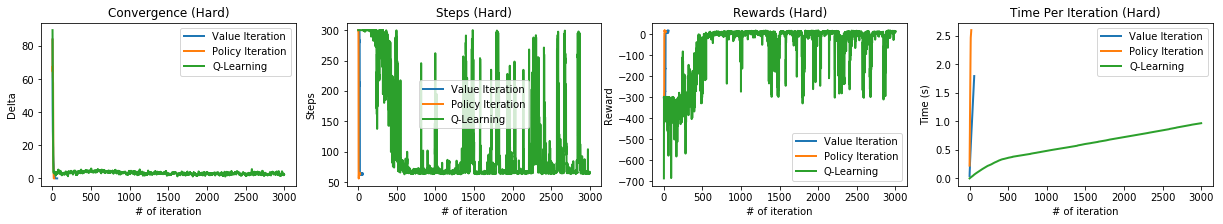